<a href="https://colab.research.google.com/github/tuanlamdao/datascience/blob/master/15_connection_extension_directions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building linear regression from raw materials

In [ ]:
from tuanlam import *

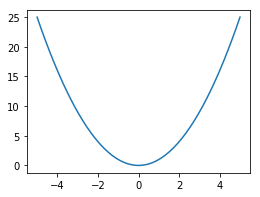

In [ ]:
xs = np.linspace(-5,5)
ys = xs**2
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(xs,ys)

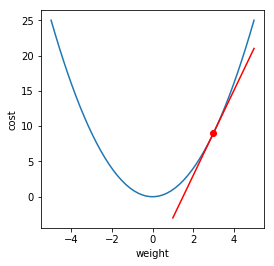

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ys = xs**2
ax.plot(xs,ys)
pt_x, pt_y = 3, 3**2
line_xs = pt_x + np.array([-2,2])
line_ys = 3**2 + (line_xs - pt_x) * (2 * pt_x)

ax.set_xlabel('weight')
ax.set_ylabel('cost')
ax.plot(pt_x,pt_y,'ro')
ax.plot(line_xs,line_ys,'r-')


Approximate location of blue grapht minimum: 0.0029296875


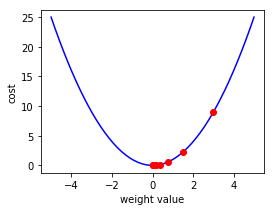

In [ ]:
weights = np.linspace(-5,5)
costs = weights**2
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(weights, costs, 'b')
weight_min = 3
for i in range(10):
    cost_at_min = weight_min**2
    ax.plot(weight_min, cost_at_min, 'ro')
    slope_at_min = 2*weight_min
    step_size = .25
    weight_min = weight_min - step_size * slope_at_min
ax.set_xlabel('weight value')
ax.set_ylabel('cost')
print("Approximate location of blue grapht minimum:", weight_min)

In [ ]:
linreg_ftrs_p1 = np.c_[np.arange(10), np.ones(10)]
true_wgts = m, b = w_1, w_0 = 3,2
linreg_tgt = rdot(true_wgts, linreg_ftrs_p1)
linreg_table = pd.DataFrame(linreg_ftrs_p1, columns=['ftrs_1', 'ones'])
linreg_table['tgt'] = linreg_tgt
linreg_table[:3]


NameError: name 'sef' is not defined

,ftrs_1,ones,tgt
0,0.0000,1.0000,2.0000
1,1.0000,1.0000,5.0000
2,2.0000,1.0000,8.0000


In [ ]:
def linreg_model(weights, ftrs):
    return rdot(weights, ftrs)
def linreg_loss(predicted, actual):
    errors = predicted - actual
    return np.dot(errors, errors)
def no_penalty(weights):
    return 0

In [ ]:
def make_cost(ftrs,tgt, model_func, loss_func, c_tradeoff, complexity_penalty):
    def cost(weights):
        return (loss_func(model_func(weights, ftrs), tgt) + c_tradeoff * complexity_penalty(weights))
    return cost


In [ ]:
from scipy.optimize import fmin as magical_minimum_finder

linreg_cost = make_cost(linreg_ftrs_p1, linreg_tgt, linreg_model, linreg_loss,0, no_penalty)
learned_wgts = magical_minimum_finder(linreg_cost,[5,5],disp=False)
print(" true weights:", true_wgts)
print(" learn weights:", learned_wgts)

 true weights: (3, 2)
 learn weights: [3. 2.]


In [ ]:
def L1_penalty(weights):
    return np.abs(weights).sum()
def L2_penalty(weights):
    return np.dot(weights, weights)


In [ ]:
linreg_L1_pen_cost = make_cost(linreg_ftrs_p1, linreg_tgt, linreg_model, linreg_loss, 1, L1_penalty)
learned_wgts = magical_minimum_finder(linreg_L1_pen_cost, [5,5], disp = False)
print("true weights:", true_wgts)
print("learned weights:", learned_wgts)


true weights: (3, 2)
learned weights: [3.0212 1.8545]


In [ ]:
linreg_L2_pen_cost = make_cost(linreg_ftrs_p1, linreg_tgt, linreg_model, linreg_loss, 1, L2_penalty)
learned_wgts = magical_minimum_finder(linreg_L2_pen_cost, [5,5], disp = False)
print("true weights:", true_wgts)
print("learned weights:", learned_wgts)

true weights: (3, 2)
learned weights: [3.0508 1.6102]


Building logistic regression from raw materials

In [ ]:
logreg_ftr = np.random.uniform(5,15,size=(100,))
true_wgts = m , b= -2,20
line_of_logodds = m*logreg_ftr +b
prob_at_x = np.exp(line_of_logodds) / (1+ np.exp(line_of_logodds))
logreg_tgt = np.random.binomial(1,prob_at_x,len(logreg_ftr))
logreg_ftrs_p1 = np.c_[logreg_ftr, np.ones_like(logreg_ftr)]
logreg_table = pd.DataFrame(logreg_ftrs_p1, columns=['ftr_1','ones'])
logreg_table['tgt'] = logreg_tgt
display(logreg_table.head())


NameError: name 'sef' is not defined

,ftr_1,ones,tgt
0,8.7454,1.0000,1
1,14.5071,1.0000,0
2,12.3199,1.0000,0
3,10.9866,1.0000,0
4,6.5602,1.0000,1


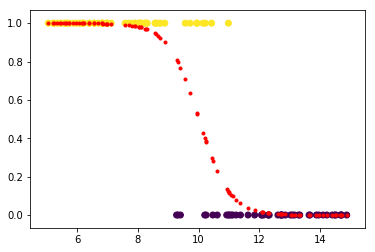

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(logreg_ftr, prob_at_x,'r.')
ax.scatter(logreg_ftr, logreg_tgt, c=logreg_tgt)

In [ ]:
def logreg_model(weights, ftrs):
    return rdot(weights, ftrs)
def logreg_loss_01(predicted, actual):
    return np.sum(-predicted * actual + np.log(1+np.exp(predicted)))
logreg_cost = make_cost(logreg_ftrs_p1,logreg_tgt,logreg_model,logreg_loss_01,0,no_penalty)
learned_wgts = magical_minimum_finder(logreg_cost,[5,5],disp=False)
print("true weights:", true_wgts)
print("learned weights:", learned_wgts)

true weights: (-2, 20)
learned weights: [-1.9774 19.8659]


In [ ]:
logreg_pen_cost = make_cost(logreg_ftrs_p1, logreg_tgt, logreg_model, logreg_loss_01, .5, L1_penalty)
learned_wgts = magical_minimum_finder(logreg_pen_cost,[5,5],disp=False)
print("true weights:", true_wgts)
print("learned weights:", learned_wgts)

true weights: (-2, 20)
learned weights: [-1.2809 12.7875]


In [ ]:
def binary_to_pm1(b):
    return (b*2) - 1
def logreg_model(weights, ftrs):
    return rdot(weights, ftrs)
def logreg_loss_pm1(predicted, actual):
    return np.sum(np.log(1+np.exp(-predicted*actual)))
logreg_cost = make_cost(logreg_ftrs_p1, binary_to_pm1(logreg_tgt),logreg_model, logreg_loss_pm1,0,no_penalty)
learned_wgts = magical_minimum_finder(logreg_cost,[5,5],disp=False)  
print("true weights:", true_wgts)
print("learned weights:", learned_wgts)                       

true weights: (-2, 20)
learned weights: [-1.9774 19.8659]


In [ ]:
def predict_with_logreg_weights_to_pm1(w_hat,x):
    prob = 1/(1+np.exp(rdot(w_hat,x)))
    thresh = prob < .5
    return binary_to_pm1(thresh)
preds = predict_with_logreg_weights_to_pm1(learned_wgts, logreg_ftrs_p1)
print(metrics.accuracy_score(preds,binary_to_pm1(logreg_tgt)))


0.93


Neural networks

In [ ]:
import keras.layers as kl
import keras.models as km
import keras.optimizers as ko

Using TensorFlow backend.


In [ ]:
def Keras_LinearRegression(n_ftrs):
    model = km.Sequential()
    model.add(kl.Dense(1,activation='linear',input_dim=n_ftrs))
    model.compile(optimizer=ko.SGD(lr=0.01),loss='mse')
    return model

In [ ]:
linreg_ftrs = linreg_ftrs_p1[:,0]
linreg_nn = Keras_LinearRegression(1)
history = linreg_nn.fit(linreg_ftrs,linreg_tgt,epochs=1000,verbose=0)
preds = linreg_nn.predict(linreg_ftrs)
mse = metrics.mean_squared_error(preds,linreg_tgt)
print("Training MSE: {:5.4f}".format(mse))


Training MSE: 0.0000


In [ ]:
history.history['loss'][:5]

[328.470703125,
 57.25974655151367,
 10.39882755279541,
 2.2973079681396484,
 0.8920284509658813]

In [ ]:
def Keras_LogisticRegression(n_ftrs):
    model = km.Sequential()
    model.add(kl.Dense(1,activation='sigmoid',input_dim=n_ftrs))
    model.compile(optimizer=ko.SGD(), loss = 'binary_crossentropy')
    return model
logreg_nn = Keras_LogisticRegression(1)
history = logreg_nn.fit(logreg_ftr, logreg_tgt, epochs=1000, verbose=0)
preds = logreg_nn.predict(logreg_ftr) > .5
print("accuarcy:", metrics.accuracy_score(preds,logreg_tgt))


accuarcy: 0.92


In [ ]:
from keras.utils import to_categorical as k_to_categorical
def Keras_MultiLogisticRegression(n_ftrs, n_classes):
    model = km.Sequential()
    model.add(kl.Dense(n_classes, activation='softmax', input_dim=n_ftrs))
    model.compile(optimizer=ko.SGD(), loss='categorical_crossentropy')
    return model
logreg_nn2 = Keras_MultiLogisticRegression(1,2)
history = logreg_nn2.fit(logreg_ftr, k_to_categorical(logreg_tgt), epochs=1000, verbose=0)
preds = logreg_nn2.predict(logreg_ftr).argmax(axis=1)
print(metrics.accuracy_score(logreg_tgt,preds))

0.89
